## Graduate Rotational Internship Program : The Sparks Foundation

## Data Science & Business Analytics Intern
### Author : Aishwarya Mandhare

### TASK 1: Prediction using Supervised ML
#### Predict the percentage of an student based on the no. of study hours.¶

This is a simple linear regression task as it involves just 2 variables.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the dataset from csv file (for this we use pandas library)

In [2]:
df=pd.read_csv(r"C:\Users\ISHWARIYA\Documents\documents\student_scores_TSF_1.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Information about data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Statistics

In [5]:
df.corr(method="pearson") 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


1) The correlation between no.of study hours and scores is 0.971891.

2) There is positive linear relationship between no.of study hours and scores.

3) This implies that if the no. of hour increase score will also increase.

## Linear Regression


1)Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. 

2)It establishes relationship between dependent variable y and one or more independent variable x using best fit line

### spliting the dataset into dependent and independent variables

In [7]:
x=df.iloc[:,:-1].values  ### independent variable

In [8]:
y=df.iloc[:,1].values   ### dependent variable

### spliting the dataset into train and test data

In [9]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Prediction using linear regression

In [11]:
y_pred=regressor.predict(x_test)

In [12]:
y_pred

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

### Difference between actual value and predicted value

In [13]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


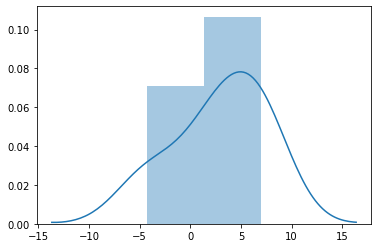

In [14]:
sns.distplot(y_test-y_pred)
plt.show()

1) The difference between target value and predicted value is close to zero

2) The model is fitting the data well

### Visualization (Scatter plot)

Text(0.5, 1.0, 'marks')

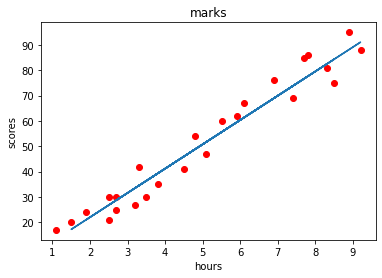

In [15]:
## Traning dataset
plt.scatter(x,y,color="red")
plt.plot(x_train,regressor.predict(x_train))
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("marks")

Text(0.5, 1.0, 'marks')

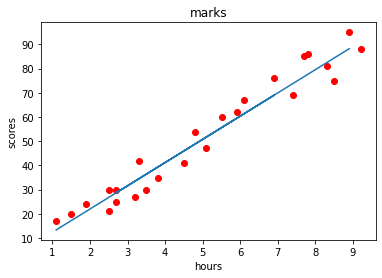

In [16]:
## Testing dataset
plt.scatter(x,y,color="red")
plt.plot(x_test,regressor.predict(x_test))
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("marks")

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
h=9.25
s=regressor.predict([[h]]) 
print("Number of hours = {}".format(h))  
print("Prediction Score = {}".format(s[0]))  

Number of hours = 9.25
Prediction Score = 91.56986604454477


### Model evaluation

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("The absolute error is",metrics.mean_absolute_error(y_test,y_pred))
print("R_squared_score",r2_score(y_test,y_pred))

The absolute error is 4.5916495300630285
R_squared_score 0.971014141329942


1)Mean Absolute Error: It is mean of absolute value of error

2)Error value is very less i.e 4.59

3)R squared score: it is not the error but its the metric for accuracy for the model.Higher the r2 value higher is the accuracy of model. Best score is 1

2)R squared score is 0.97 i.e our model is predicting 97% of the data